<a href="https://colab.research.google.com/github/lamcnguyen89/2D_Image_to_3D_Model/blob/main/CAP_6411_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 2: SDXL Turbo and SDXL



 # https://huggingface.co/datasets/Gustavosta/Stable-Diffusion-Prompts/viewer/default/test
 # Go to the "People" section in Webcourses
 # If you are the first student, for example, you will take the first 10 prompts from the above link, second student the 11-20th prompts in the list and so on
 # Run SDXL Turbo and SDXL on those prompts assigned to you
  # Compare both models with two metrics:
      # FID
      # Speed

  # Report Due Date: 27Aug2024






In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy peft

In [3]:
# Prompt Array

prompt_array = [
    "character portrait of buff barbarian karl marx with a tattoo of an eye on the forehead, dungeons and dragons cover artwork, dynamic composition, dramatic lighting, trending on artstation, award winning art, stylized painting, concept art, 4 k, 8 k, gold and teal color scheme",
    "hyperrealistic mixed media high resolution image of Danny DeVito crawling out of Arnold Schwarzenegger’s belly button in Total Recall, alien, stunning 3d render inspired art by István Sándorfi and Greg Rutkowski and Unreal Engine, perfect symmetry, dim volumetric lighting, 8k octane beautifully detailed render, post-processing, extremely hyper-detailed, intricate, epic composition, highly detailed attributes, highly detailed atmosphere, full body shot, cinematic lighting, masterpiece, trending on artstation, very very detailed, masterpiece, stunning, flawless structure, lifelike texture, perfection",
    "key shot of ancient underground dungeon, studio ghibli, bloom, anime key art, gloomhaven, organic painting, hard edges, luminescent, octane render, by greg manchess, huang guangjian, greg rutkowski, jesper ejsing, rhads, cushart krenz, anton fadeev",
    "bob ross!!! riding!!! a dinosaur!!, giant afro!, model pose, ultra realistic, concept art, intricate details, highly detailed, photorealistic, octane render, 8 k, unreal engine octane render art by artgerm and greg rutkowski and alphonse mucha",
    "a happy zombie eating a chocolate brain, Tristan Eaton, victo ngai, artgerm, RHADS, ross draws",
    "a young handsome latino ceramic and pink iron-plated android prince with a large glowing mint crystal in the center of his chest, full-body bronze cyberpunk style statue of Andromeda with glowing green laser eyes, crown of mechanical chrysanthemums, flowing aqua silk, fabric, steampunk flowers. baroque elements, human skull. full-length view. baroque element. intricate artwork by caravaggio. many flying horses on background. Trending on artstation, octane render, cinematic lighting from the right, hyper realism, octane render, 8k, depth of field, 3D",
    "Kanye West playing the piano in the middle of a garden, vintage camera, dreamy, atmospheric, golden hour, cinematic lighting, 8K concept art",
    "ultra realistic illustration, man in a black hood, in a striped purple balaclava, mysterious, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration",
    "Anime Girl Sitting on Edge of Cliff at a Green Valley at Sunset, Golden Hour! Trending on Artstation, Pixiv, Deviant Art!",
    "a thin blonde lady as a gta 5 cover, real life skin, intricate, highly detailed, artstation, concept art, smooth, sharp focus, art by artgerm and greg rutkowski"
]

In [2]:
# Initiate the Stable Diffusion XL Pipeline

import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline, TCDScheduler
from huggingface_hub import hf_hub_download

# Enable GPU in Google Collab by:
  # Go to Menu > Runtime > Change runtime > Choose any device with the word "GPU"

# Choose either 8 or 12 steps:
num_inference_steps = 12

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "ByteDance/Hyper-SD"
plural = "s" if num_inference_steps > 1 else ""
ckpt_name = f"Hyper-SDXL-{num_inference_steps}step{plural}-CFG-lora.safetensors"
device = 'cuda'

sdxl_pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to(device)
sdxl_pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
sdxl_pipe.fuse_lora()
sdxl_pipe.scheduler = TCDScheduler.from_config(sdxl_pipe.scheduler.config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to TCDScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [3]:
# Initiate the Stable Diffusion XL Turbo Pipeline
import mediapy as media
import random
import sys
import torch

from diffusers import AutoPipelineForText2Image

base_model_id = "stabilityai/sdxl-turbo"
device = 'cuda'

sdxl_turbo_pipe = AutoPipelineForText2Image.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to(device)





Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	a photo of Pikachu fine dining with a view to the Eiffel Tower
Seed:	3529658812088540329


""

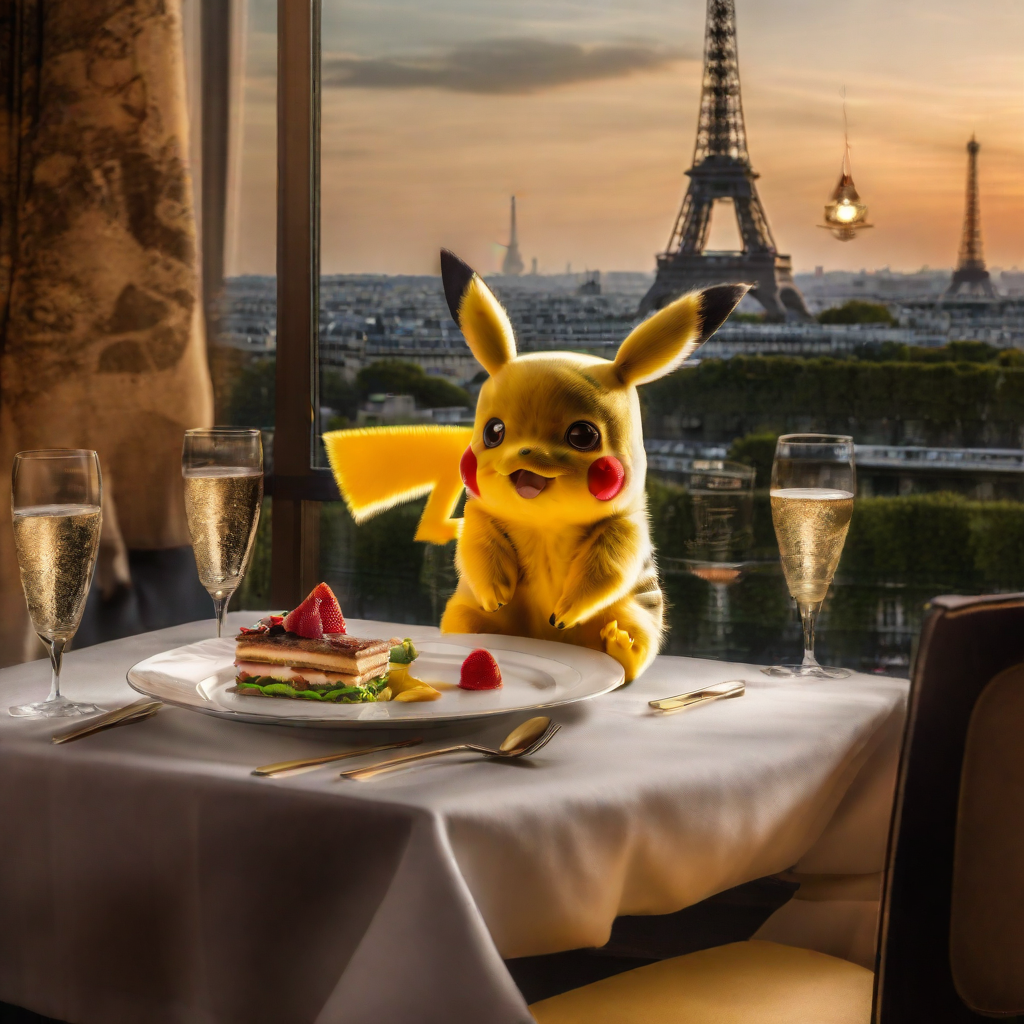

In [3]:
prompt = "a photo of Pikachu fine dining with a view to the Eiffel Tower"
seed = random.randint(0, sys.maxsize)

# Pick a value between 5.0 and 8.0:
guidance_scale = 5.0

# Decrease eta (min: 0, max: 1.0) to get more details with multi-step inference:
eta = 0.5

# Show the SDXL Image
sdxl_images = sdxl_pipe(
    prompt = prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    eta = eta,
    generator = torch.Generator(device).manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(sdxl_images)
sdxl_images[0].save("output.jpg")

  0%|          | 0/1 [00:00<?, ?it/s]

Prompt:	a photo of Pikachu fine dining with a view to the Eiffel Tower


""

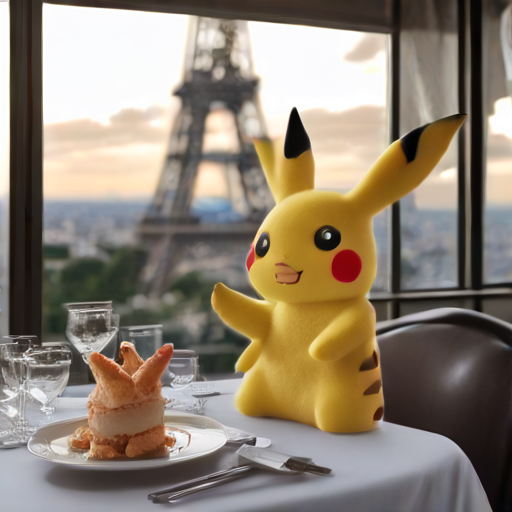

In [4]:
# Generate sdxl_turbo Images

prompt = "a photo of Pikachu fine dining with a view to the Eiffel Tower"

guidance_scale = 0
num_inference_steps = 1

# Decrease eta (min: 0, max: 1.0) to get more details with multi-step inference:
eta = 0.5

sdxl_turbo_images = sdxl_turbo_pipe(
    prompt = prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    ).images

print(f"Prompt:\t{prompt}")
media.show_images(sdxl_turbo_images)
sdxl_turbo_images[0].save("output_1.jpg")
